In [1]:
!pip install pytorch-lightning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 46.3 MB/s eta 0:00:00


Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


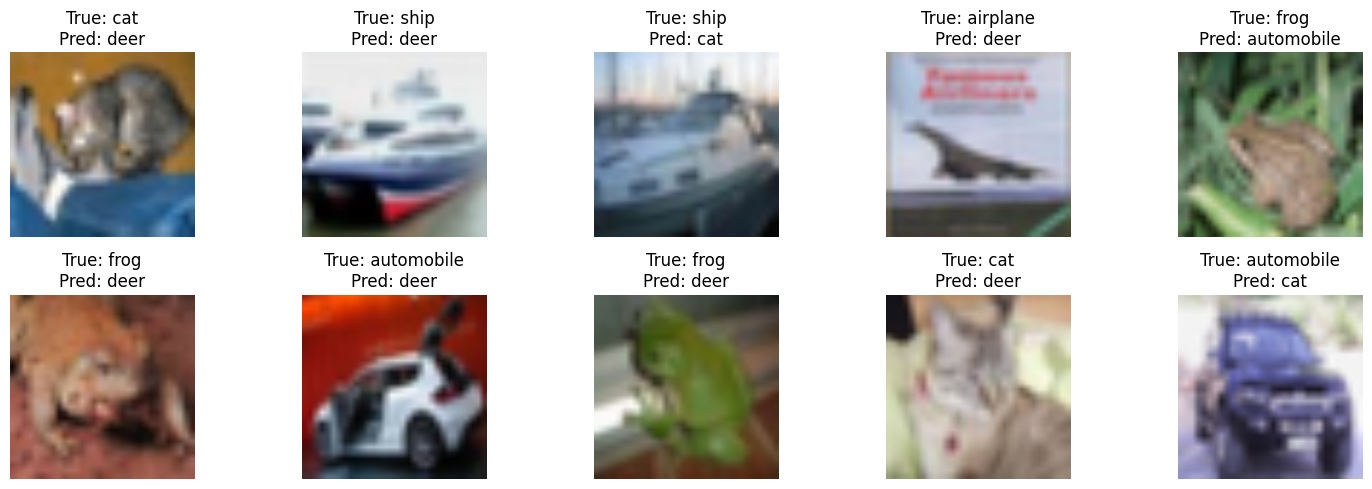

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from torchvision.models import vgg19
import matplotlib.pyplot as plt
import numpy as np

# Define a Lightning Module
class VGG19Classifier(pl.LightningModule):
    def __init__(self):
        super(VGG19Classifier, self).__init__()
        self.model = vgg19(pretrained=True)
        # Modify the classifier for CIFAR-10 (10 classes)
        self.model.classifier[6] = torch.nn.Linear(4096, 10)

    def forward(self, x):
        return self.model(x)

# Data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # VGG19 expects 224x224 images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load CIFAR-10 dataset
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Initialize model
model = VGG19Classifier()
model.eval()  # Set to evaluation mode

# Predict and display 10 images
images, labels = next(iter(test_loader))
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

# Class names
classes = test_dataset.classes

# Display images with predictions
plt.figure(figsize=(15, 5))
for i in range(10):
    img = images[i].permute(1, 2, 0).numpy()
    img = np.clip(img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]), 0, 1)  # Denormalize

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"True: {classes[labels[i]]}\nPred: {classes[preds[i]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
